In [11]:
import pandas as pd

In [12]:
data=pd.read_csv("books.csv")

In [13]:
data.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [14]:
data.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

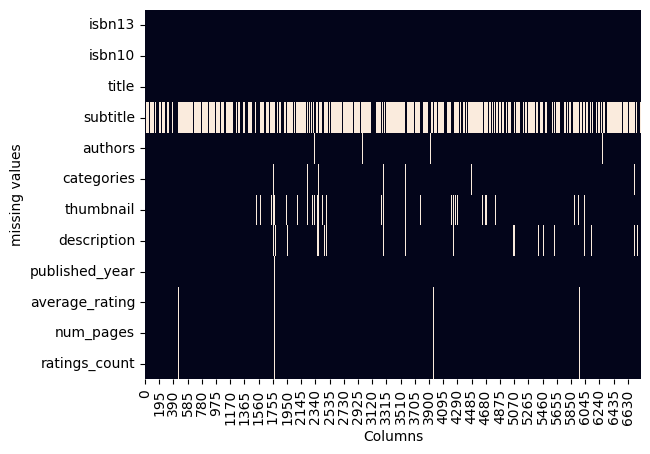

In [6]:
ax=plt.axes()
sns.heatmap(data.isna().transpose(),cbar=False,ax=ax)
plt.xlabel("Columns")
plt.ylabel("missing values")
plt.show()

In [7]:
import numpy as np
data['missing_description']=np.where(data['description'].isna(),1,0)
data['age_of_book']=2025-data['published_year']

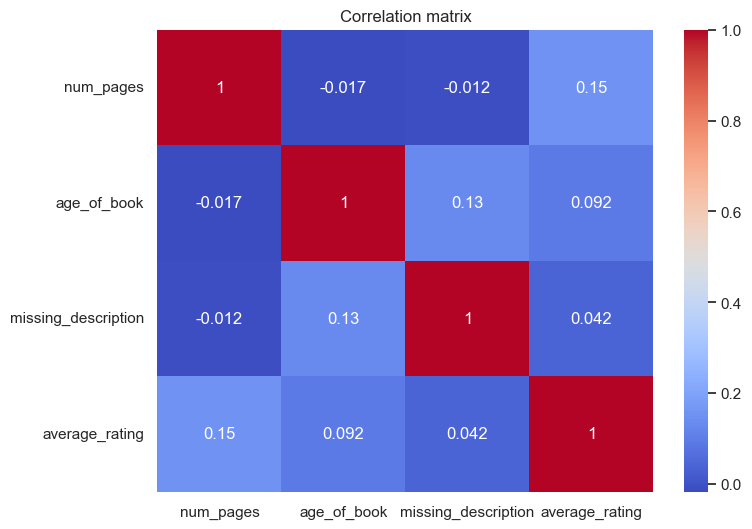

In [8]:
columns_of_interest=['num_pages','age_of_book','missing_description','average_rating']

corr_mat=data[columns_of_interest].corr(method='spearman')
plt.figure(figsize=(8,6))
sns.set_theme(style="white")
heatmap=sns.heatmap(corr_mat,annot=True,cmap="coolwarm")
heatmap.set_title('Correlation matrix')
plt.show()

In [9]:
book_missing = data[
    ~(data["description"].isna()) &
    ~(data["num_pages"].isna()) &
    ~(data["average_rating"].isna()) &
    ~(data["published_year"].isna())
]


In [10]:
book_missing['categories'].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [15]:
book_missing['words_in_description']=book_missing['description'].str.split().str.len()

In [17]:
book_missing.sample(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
2061,9780375415036,0375415033,Essays,NaN,George Orwell,Literary Collections,http://books.google.com/books/content?id=Bm1yQ...,Presents a collection of essays from George Or...,2002.0,4.33,1369.0,598.0,0,23.0,45
5819,9781402200458,1402200455,60 Million Frenchmen Can't be Wrong,NaN,Jean-Benoît Nadeau;Julie Barlow,Social Science,http://books.google.com/books/content?id=7h8Hk...,"""Sixty Million Frenchmen does its job marvelou...",2003.0,3.74,351.0,2107.0,0,22.0,30
6762,9781932796780,1932796789,Dragons of Winter Night,NaN,Margaret Weis;Tracy Hickman;Andrew Dabb,Comics & Graphic Novels,http://books.google.com/books/content?id=92L9u...,"When dragons invade the land, a small band of ...",2007.0,4.14,358.0,33846.0,0,18.0,41
4558,9780751514629,0751514624,Different Seasons,NaN,Stephen King,Castle Rock (Me. : Imaginary place),http://books.google.com/books/content?id=qXKAQ...,A Stephen King novel telling of unfair impriso...,1995.0,4.35,560.0,121420.0,0,30.0,10
3931,9780674992023,0674992024,Hiero,Agesilaus ; Constitution of the Lacedaemonians...,Xenophon,Electronic books,http://books.google.com/books/content?id=4Q0IA...,Minor works by Xenophon (c. 430-c. 354 BCE) in...,1925.0,3.94,576.0,18.0,0,100.0,403


In [19]:
len(book_missing.loc[book_missing['words_in_description'].between(1,4),"description"])

55

In [21]:
book_missing.shape

(6507, 15)

In [22]:
len(book_missing.loc[book_missing['words_in_description'].between(4,25),"description"])

1377

In [23]:
book_missing_25=book_missing[book_missing['words_in_description']>=25]

In [25]:
book_missing_25.shape

(5197, 15)

In [29]:
book_missing_25['title_and_subtitle']=(
    np.where(book_missing_25['subtitle'].isna(),book_missing_25['title'],
             book_missing_25[['title','subtitle']].astype(str).agg(":".join,axis=1))
)

C:\Users\deend\AppData\Local\Temp\ipykernel_24216\3031872047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25['title_and_subtitle']=(


In [30]:
book_missing_25.sample(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
6481,9781740599085,174059908X,Amsterdam,NaN,Andrew Bender,Travel,http://books.google.com/books/content?id=_iiWT...,Marvel at the Dutch Masters and take a step ba...,2006.0,3.87,298.0,16.0,0,19.0,131,Amsterdam
478,9780064402453,0064402452,Racso and the Rats of NIMH,NaN,Jane Leslie Conly,Juvenile Fiction,http://books.google.com/books/content?id=MgoNv...,"‘Racso, a brash and boastful little rodent, is...",1988.0,3.76,288.0,3231.0,0,37.0,98,Racso and the Rats of NIMH
1719,9780330412445,0330412442,Bosnia,A Short History,Noel Malcolm,Bosnia and Hercegovina,http://books.google.com/books/content?id=ToYfe...,This work aims to set the war in the Balkans i...,2002.0,4.06,384.0,33.0,0,23.0,29,Bosnia:A Short History
4902,9780786929207,0786929200,The Players of Gilean,Tales from the World of Krynn,Margaret Weis;Tracy Hickman,Fiction,http://books.google.com/books/content?id=58ZtA...,The first anthology based on characters from t...,2003.0,3.64,320.0,142.0,0,22.0,46,The Players of Gilean:Tales from the World of ...
5480,9780879074494,0879074493,Exercitia Spiritualia,NaN,Saint Gertrude (the Great),Religion,http://books.google.com/books/content?id=aehfQ...,The most scholarly of the remarkable nuns of H...,1989.0,3.20,165.0,5.0,0,36.0,62,Exercitia Spiritualia
